In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import enlopy as el
import pickle

%matplotlib notebook

## Solar data
The free solar irradiance data is found [here](http://www.soda-pro.com/web-services/radiation/helioclim-3-archives-for-free)

In [3]:
def change_time(x):
    if x[-5:] == '24:00':
        return str(pd.to_datetime(x[:-6]) + pd.to_timedelta('1d'))
    else:
        return x
    

In [24]:
def pickle_savefig(fig,figname):
    matplotlib_name = 'figs/' + figname + '_plt.p'
    with open(matplotlib_name,'wb') as f:
        pickle.dump(fig,f)
    fig.savefig('figs/' + figname +'.png')

<IPython.core.display.Javascript object>


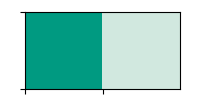

In [12]:
def nmbu_palette(color_path='C:\\Users\\vegar\\Dropbox\\Master\\thesis.git\\data'):
    """
    Createes list with rbg of nmbu colors. Can be fed to seaborn.set_palette()
    :return:
    """
    color_path += '\\nmbu_palette.csv'
    colorframe = pd.read_csv(color_path)
    colorframe = colorframe[['r', 'g', 'b']].values
    palette = [colorframe[k, :] for k in range(colorframe.shape[0])]
    return palette
palette = nmbu_palette()
line_colors = [palette[k] for k in [0,8]]
bar_colors = [palette[k] for k in [0,1]]
sns.palplot(bar_colors)

In [4]:
path = 'data/solar_free.csv'
df = pd.read_csv(path,sep=';',skiprows = range(31))

data= df.loc[:,['Global Horiz', 'Clear-Sky']]
k = df['# Date'] +' '+ df['Time']
k = k.apply(lambda x: change_time(x))
data.index = pd.to_datetime(k)

In [5]:
start_date = '2004-02-11 00:00:00'
end_date = '2004-10-03 15:20:00'
good_data = data[start_date:end_date]['Global Horiz']
good_data = pd.DataFrame(good_data/good_data.max())
good_data = good_data.rename(columns={'Global Horiz':'Solar irradiance'})

In [19]:
good_data.head()

,Solar irradiance
2004-02-11 00:00:00,0.0
2004-02-11 00:10:00,0.0
2004-02-11 00:20:00,0.0
2004-02-11 00:30:00,0.0
2004-02-11 00:40:00,0.0


<IPython.core.display.Javascript object>


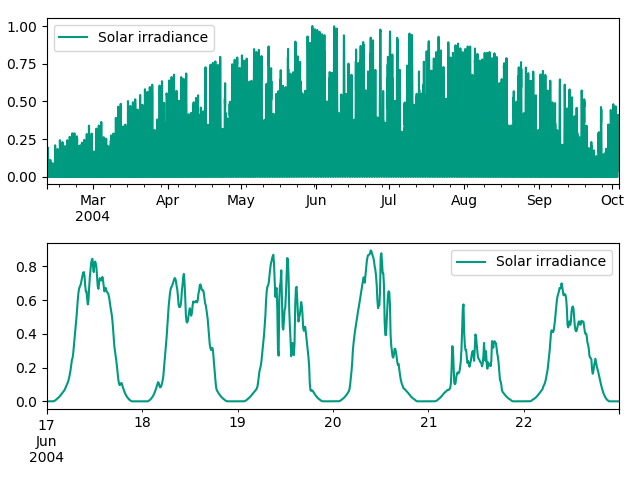

In [27]:
sns.set_palette(palette)
fig, axes = plt.subplots(2)
good_data.plot(ax=axes[0])
good_data['2004-06-17 ':'2004-06-22'].plot(ax=axes[1])
plt.tight_layout()

In [28]:
#pickle_savefig(fig,'solar_data')

## Plots

<IPython.core.display.Javascript object>


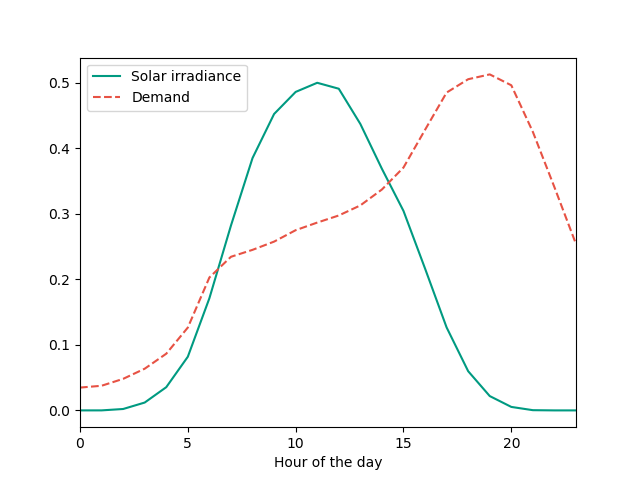

Text(0.5, 0, 'Hour of the day')

In [35]:
sns.set_palette(line_colors)
hourly = good_data.rolling(window='1h').mean()[4::6]
demand = []
days = (hourly.index[-1] - hourly.index[0]).days
for _ in range(days + 1):
    demand += list(el.generate.gen_daily_stoch_el())
hourly['Demand'] = demand[:len(hourly)]
hourly['Demand'] /= 0.15
fig, ax = plt.subplots()

hourly.groupby(hourly.index.hour).mean().plot(ax=ax, style=['-','--'])
ax.set_xlabel('Hour of the day')

In [36]:
#pickle_savefig(fig,'demand_and_solar')

## Save hourly mean values

In [80]:
#hourly = good_data.rolling(window='1h').mean()[0::6]
#hourly.to_csv('hourly_solar_data.csv')

## Demand data
Better to save demand data to a file with timestamps (as the solar data). Seeding will then work for demand as well.

In [6]:
(end - start).days


235

<IPython.core.display.Javascript object>


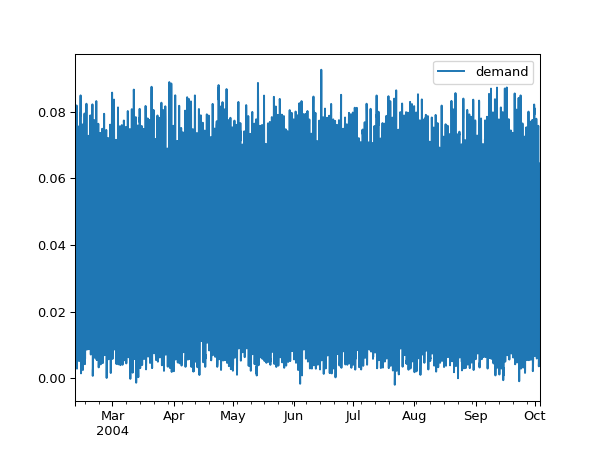

In [12]:
start, end = '2004-02-11 00:00:00', '2004-10-03 15:00:00 '
start, end = pd.to_datetime(start),  pd.to_datetime(end)
nr_days = (end - start).days
demand_forcast = []
for day in range(nr_days+1):
    day = list(el.generate.gen_daily_stoch_el())
    demand_forcast += day
    
datetime_index = pd.date_range(start=start, end=end, freq='H')    
df = pd.DataFrame(index=datetime_index)
df['demand'] = demand_forcast[:len(df)]

fig,ax = plt.subplots()
df.plot(ax=ax)

In [13]:
df.to_csv('data\\hourly_demand_data.csv')

In [16]:
demand = pd.read_csv('data\\hourly_demand_data.csv')
demand.index = pd.to_datetime(demand.iloc[:, 0])
demand.index.name = 'time'
demand = demand.iloc[:, [1]]
demand

,demand
time,
2004-02-11 00:00:00,0.009654
2004-02-11 01:00:00,0.006993
2004-02-11 02:00:00,0.006974
2004-02-11 03:00:00,0.007671
2004-02-11 04:00:00,0.012272
2004-02-11 05:00:00,0.013018
2004-02-11 06:00:00,0.027246
2004-02-11 07:00:00,0.031521
2004-02-11 08:00:00,0.033794
